In [1]:
from pathlib import Path

notebook_path = Path().cwd().parent.parent.parent.parent
import sys

sys.path.insert(0, str(notebook_path))

import pandas as pd

from explore.gcp.storage import gcp
from explore.src.preprocess.clean_stats import Cleaning
from explore.src.utilities.eda_funcs import describe_data
from explore.src.visualisation.exploratory_visuals import StatisticPlots
from explore.src.visualisation.wages_visual import WagesVisuals

import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [2]:
df = gcp.read_df_from_bucket(
    bucket_name="fbref_db", blob_name="Bundesliga-wages.csv"
)

[03/07/24 18:43:39] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=944714;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=932504;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

                    INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=407162;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=276965;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [3]:
df.head()

,rk,player,nation,pos,squad,age,weekly_wages_euros,annual_wages_euros,notes,season
0,1,Franck Ribéry,FRA,"FW,MF",Bayern Munich,34,303846,15800000,Unverified estimation,2017-2018
1,2,Robert Lewandowski,POL,FW,Bayern Munich,28,303846,15800000,Unverified estimation,2017-2018
2,3,Thomas Müller,GER,"MF,FW",Bayern Munich,27,286538,14900000,Unverified estimation,2017-2018
3,4,Manuel Neuer,GER,GK,Bayern Munich,31,285769,14860000,Unverified estimation,2017-2018
4,5,Jérôme Boateng,GER,DF,Bayern Munich,28,227885,11850000,Unverified estimation,2017-2018


In [4]:
df.shape

(3752, 10)

In [5]:
describe_data(df)

,Data Types,Null Counts,Null %,Unique Values,Min,Max,Median,Mean,Std Dev,Outliers,Outliers %
rk,int64,0,0.0,565,1,565,268.5,269.47,156.36,0,0.00
age,int64,0,0.0,26,15,43,24.0,24.63,4.47,3,0.08
weekly_wages_euros,int64,0,0.0,412,58,480769,15000.0,31184.28,49935.17,237,6.32
annual_wages_euros,int64,0,0.0,412,3000,25000000,780000.0,1621582.12,2596629.34,237,6.32


In [6]:
df = Cleaning(df).pipeline()

SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-SCT', country_code='GB', name='Scotland', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='En

In [7]:
df.head()

,rk,player,nation,pos,squad,age,weekly_wages_euros,annual_wages_euros,notes,season,general_pos,age_range,country,continent
0,1,Franck Ribéry,FRA,"FW,MF",Bayern Munich,34,303846,15800000,Unverified estimation,2017-2018,Forward,30-34,France,Europe
1,2,Robert Lewandowski,POL,FW,Bayern Munich,28,303846,15800000,Unverified estimation,2017-2018,Forward,25-29,Poland,Europe
2,3,Thomas Müller,GER,"MF,FW",Bayern Munich,27,286538,14900000,Unverified estimation,2017-2018,Midfielder,25-29,Germany,Europe
3,4,Manuel Neuer,GER,GK,Bayern Munich,31,285769,14860000,Unverified estimation,2017-2018,Goalkeeper,30-34,Germany,Europe
4,5,Jérôme Boateng,GER,DF,Bayern Munich,28,227885,11850000,Unverified estimation,2017-2018,Defender,25-29,Germany,Europe


In [8]:
stat_plots = StatisticPlots(df)

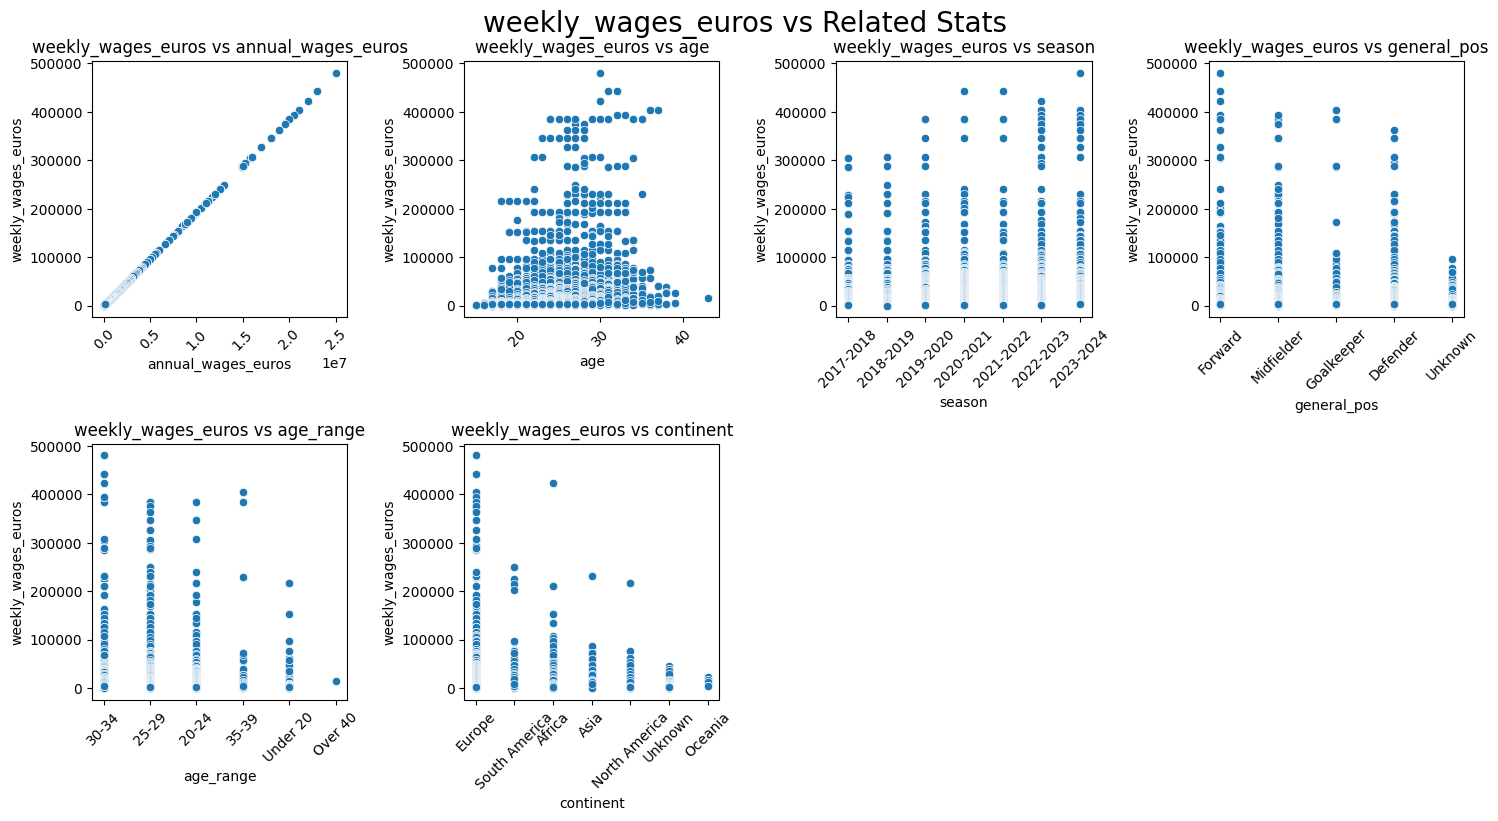

In [9]:
stat_plots.relationships(
    y="weekly_wages_euros",
    X=["annual_wages_euros", "age", "season", "general_pos", "age_range", "continent"],
)

In [10]:
wage_plots = WagesVisuals(df)

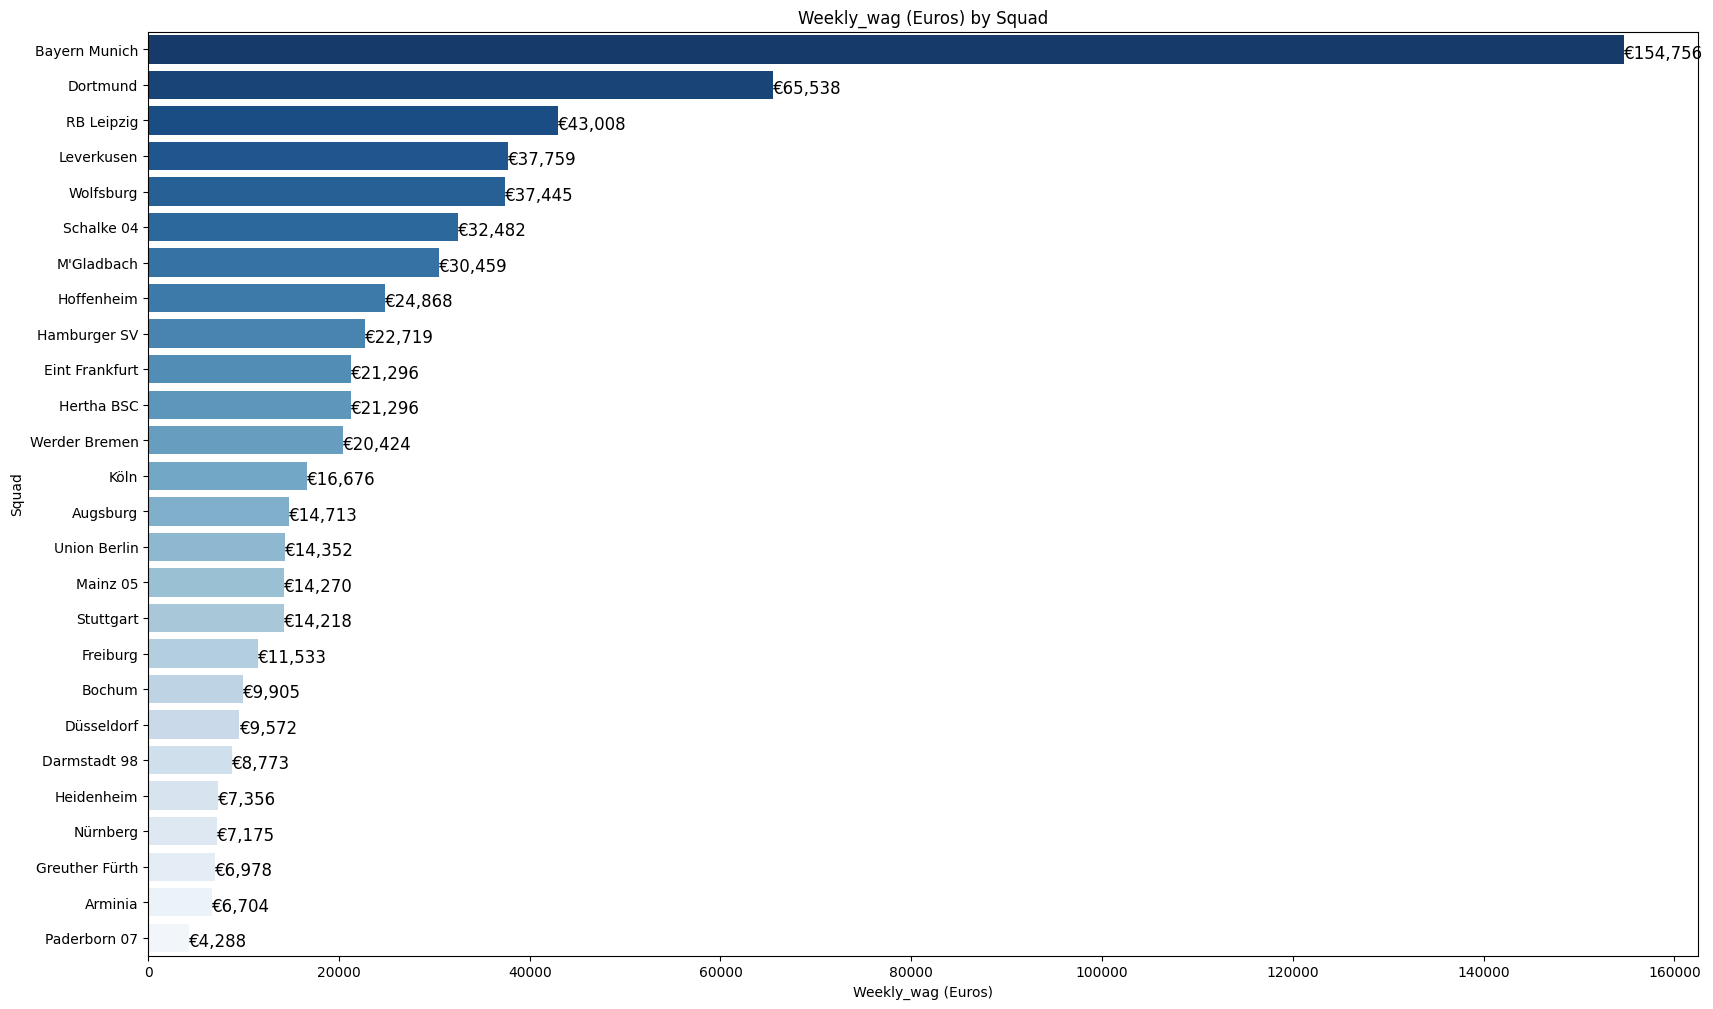

In [11]:
wage_plots.total_wage_avgs('squad')

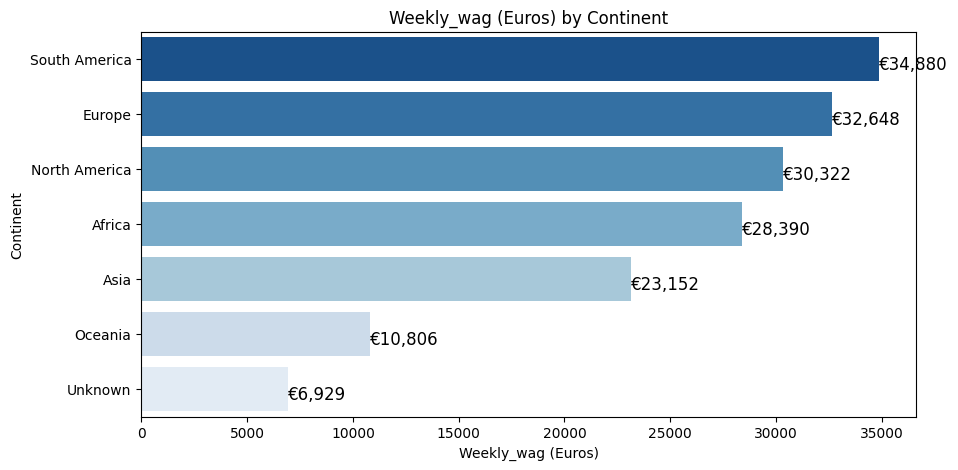

In [12]:
wage_plots.total_wage_avgs('continent', figsize=(10, 5))

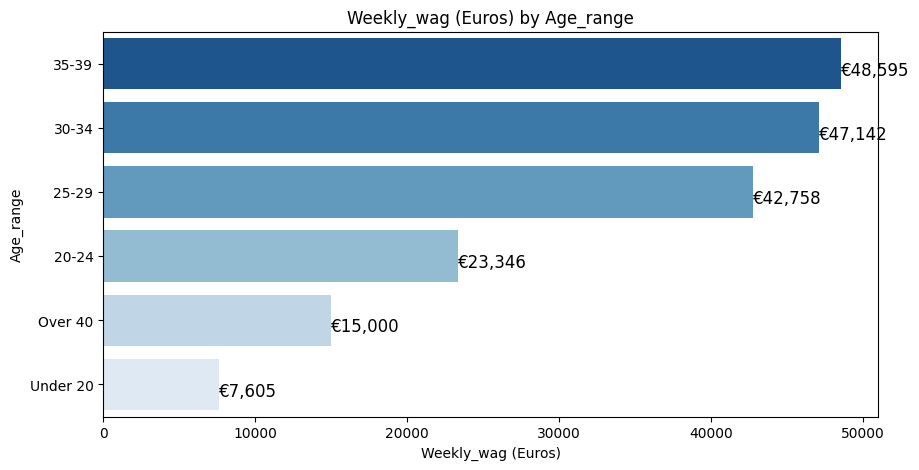

In [13]:
wage_plots.total_wage_avgs('age_range', figsize=(10, 5))

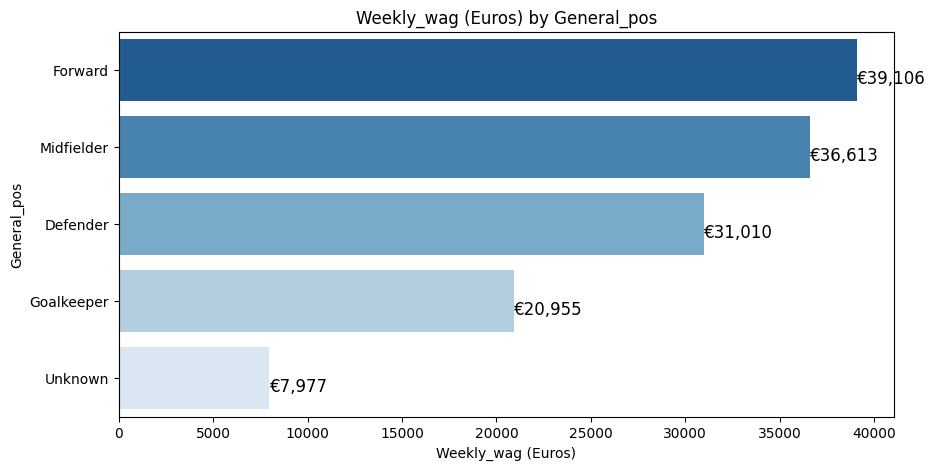

In [14]:
wage_plots.total_wage_avgs('general_pos', figsize=(10, 5))

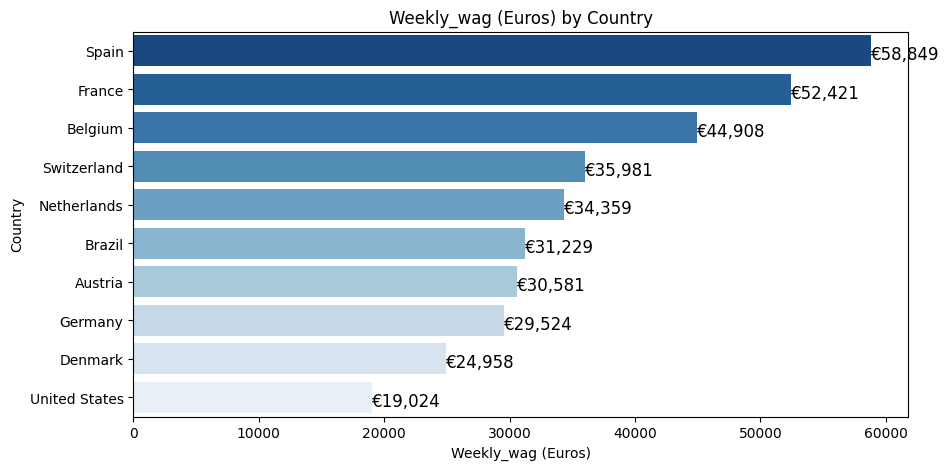

In [15]:
wage_plots.total_wage_avgs('country', figsize=(10, 5))

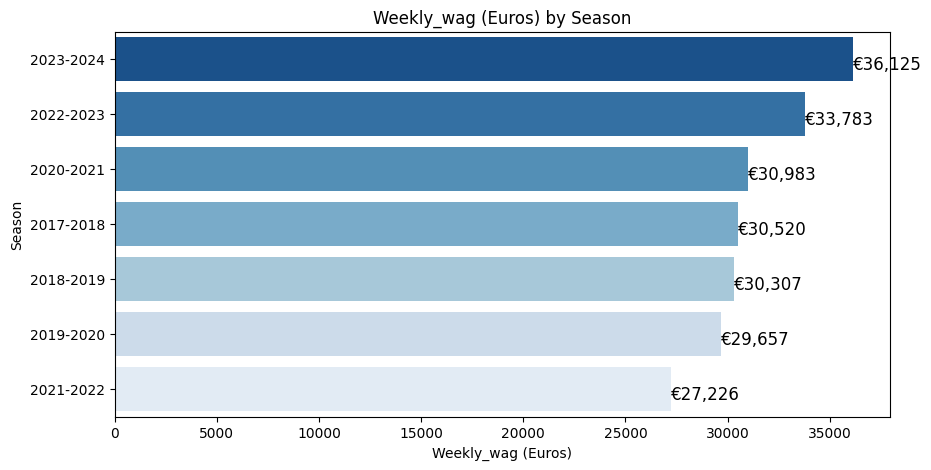

In [16]:
wage_plots.total_wage_avgs('season', figsize=(10, 5))

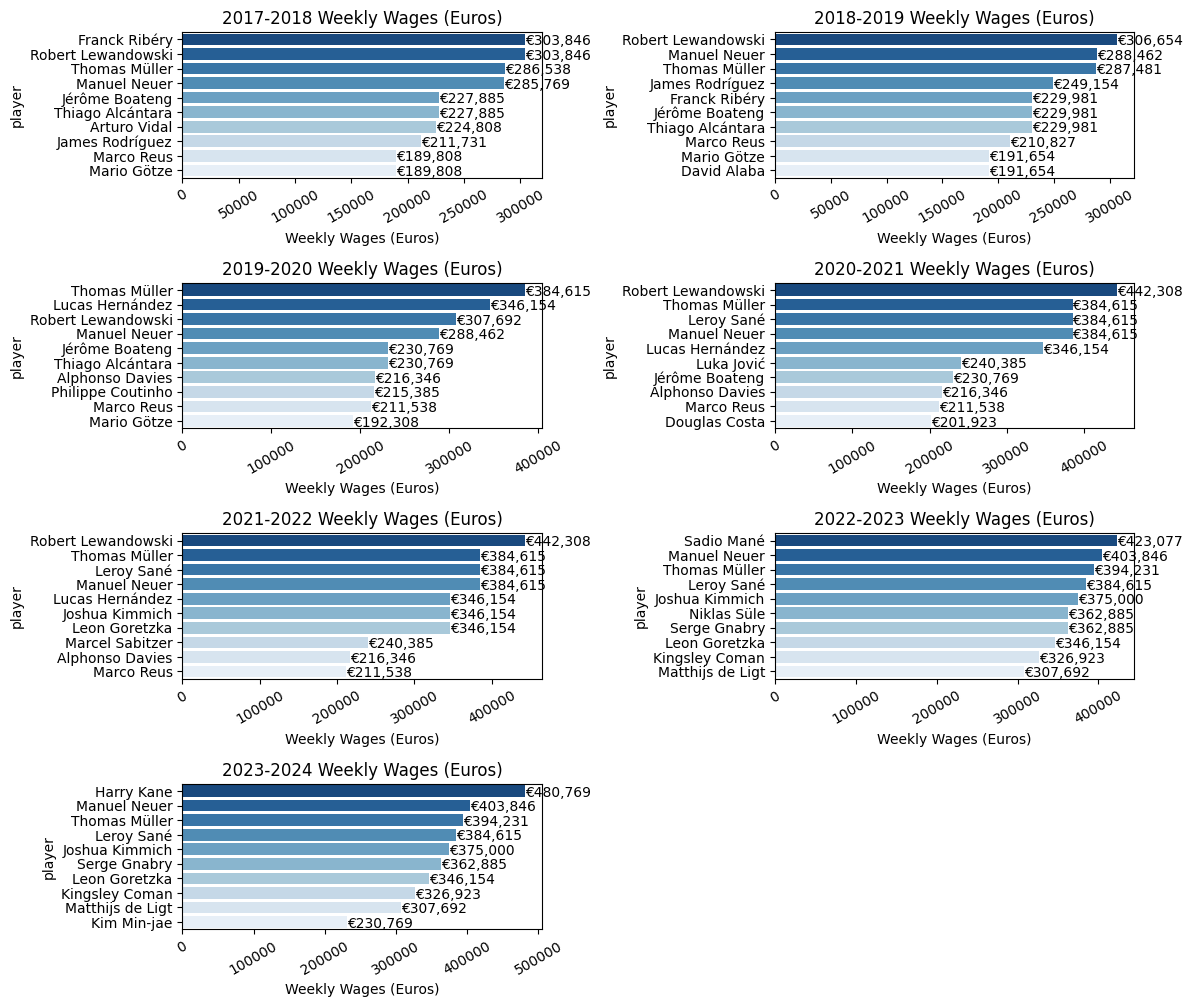

In [17]:
wage_plots.top_earners()

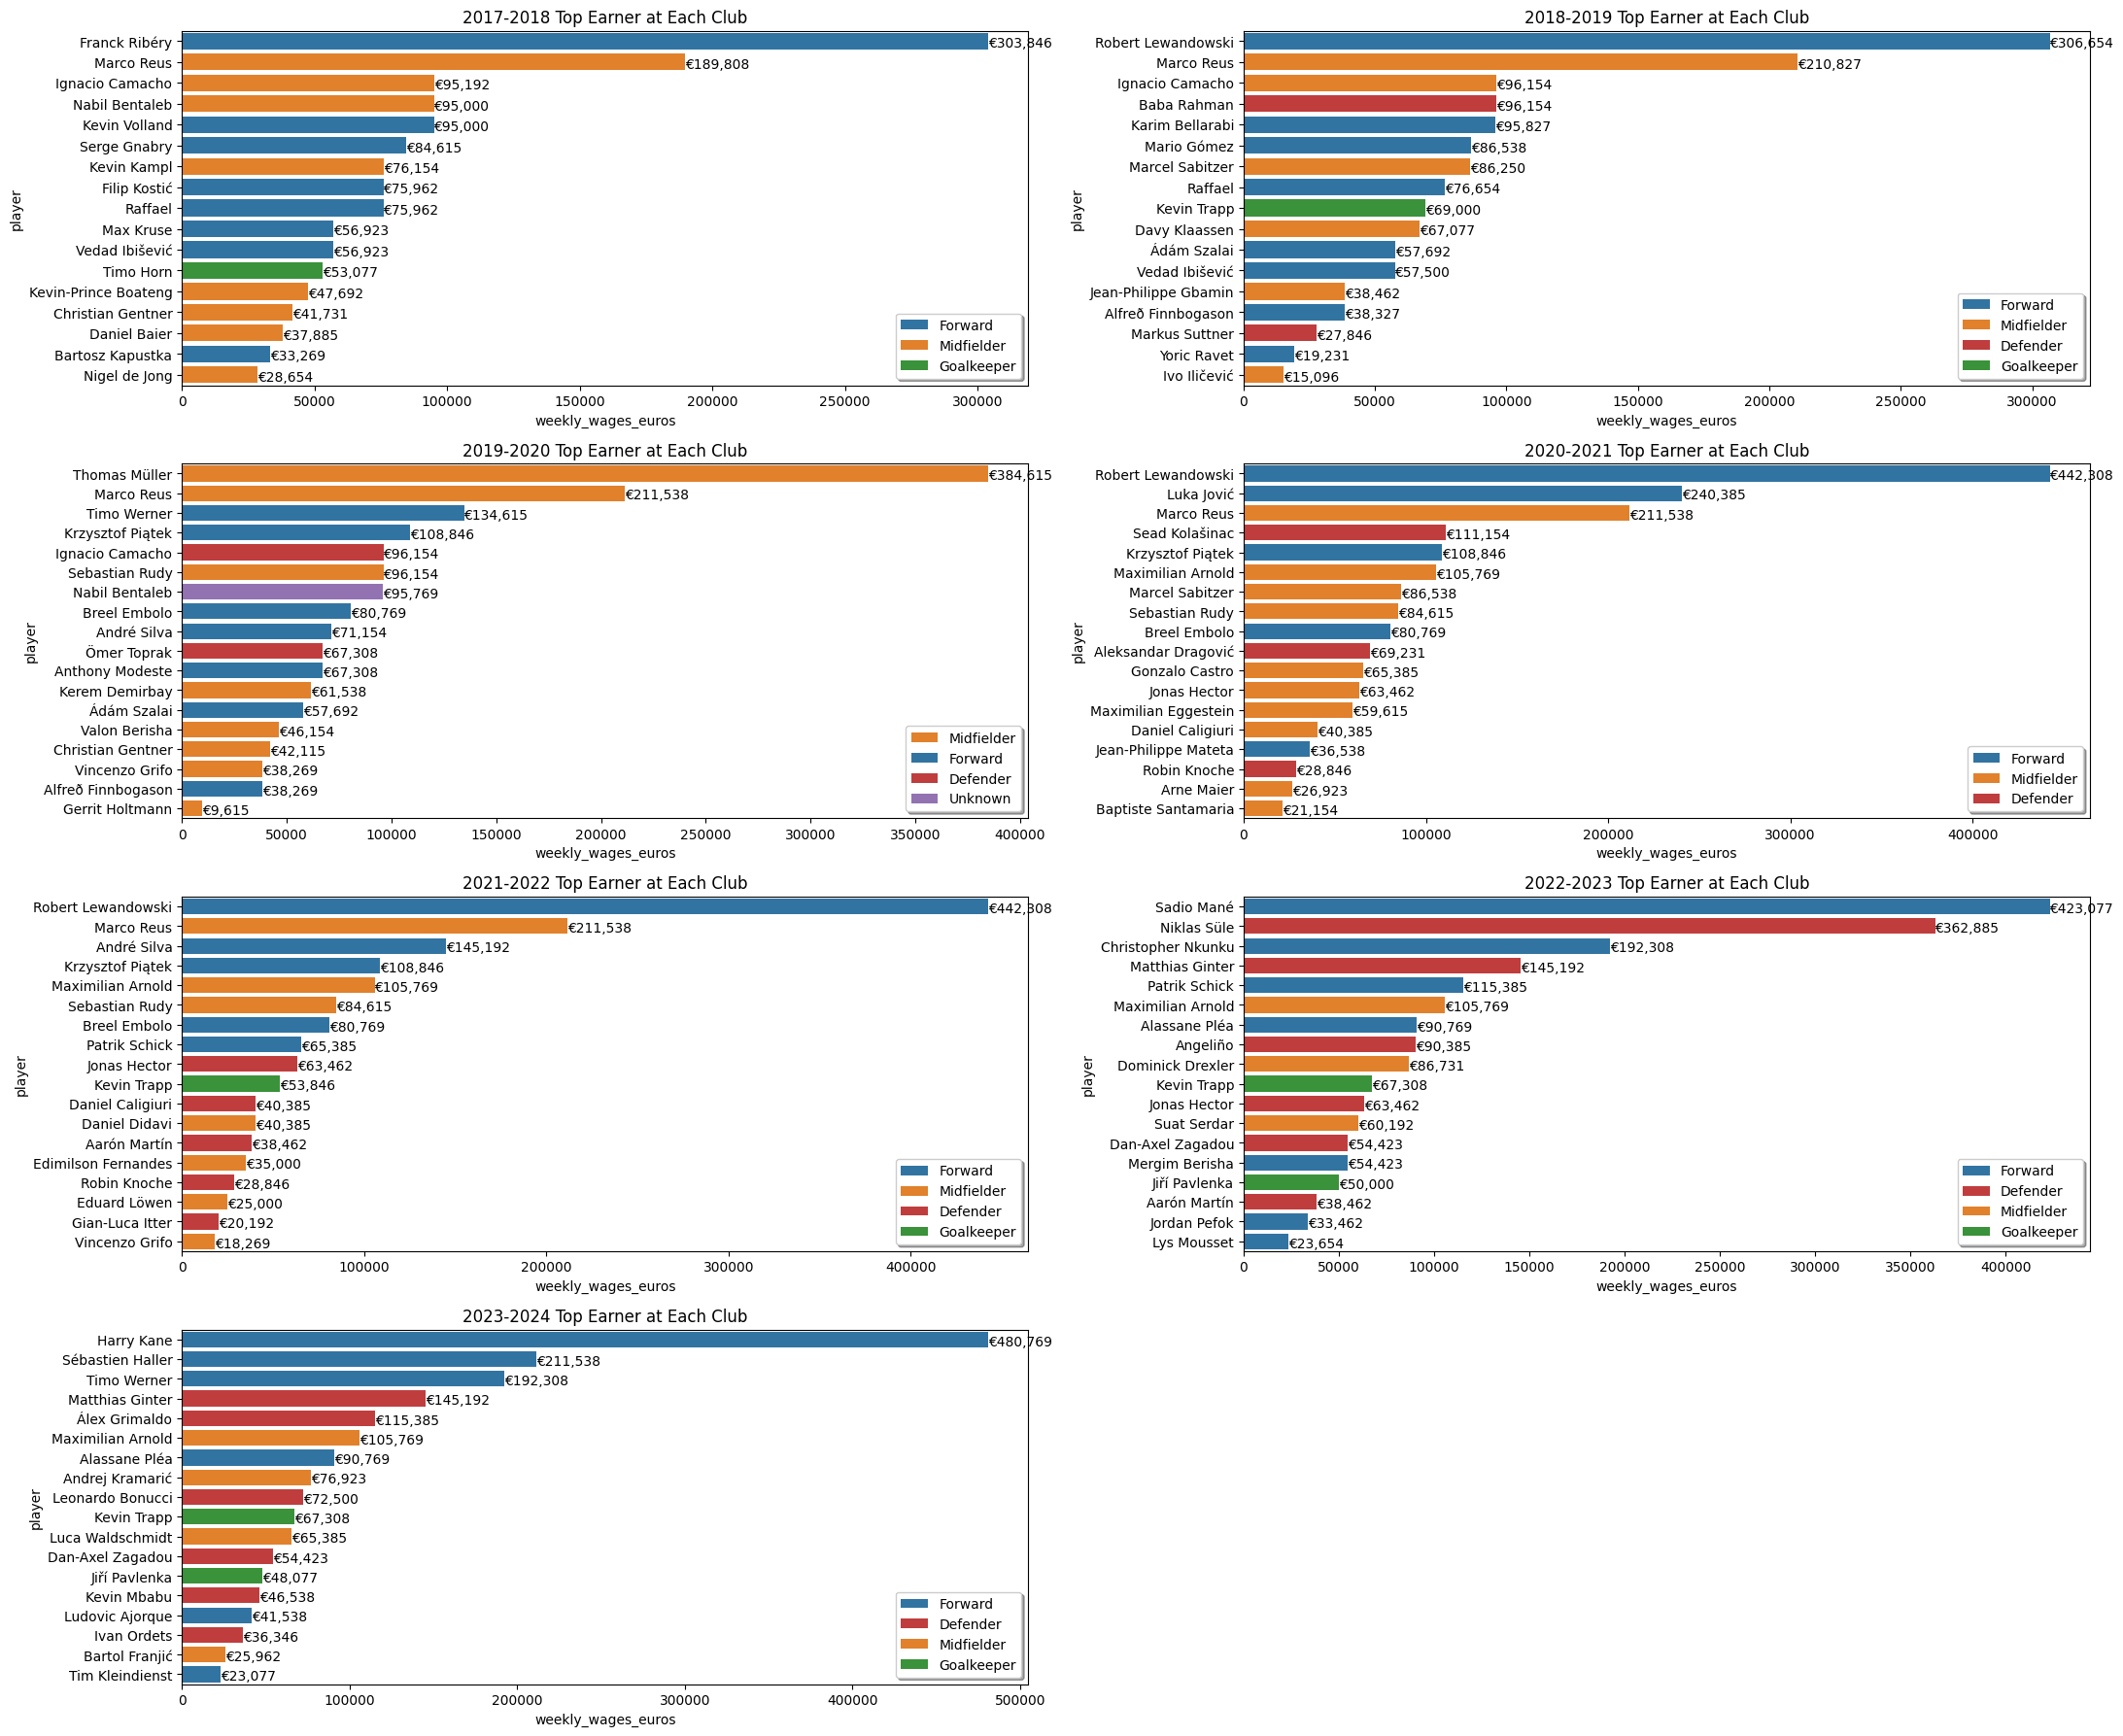

In [18]:
wage_plots.top_earners_season_var(hue='general_pos', yaxis_var='player')

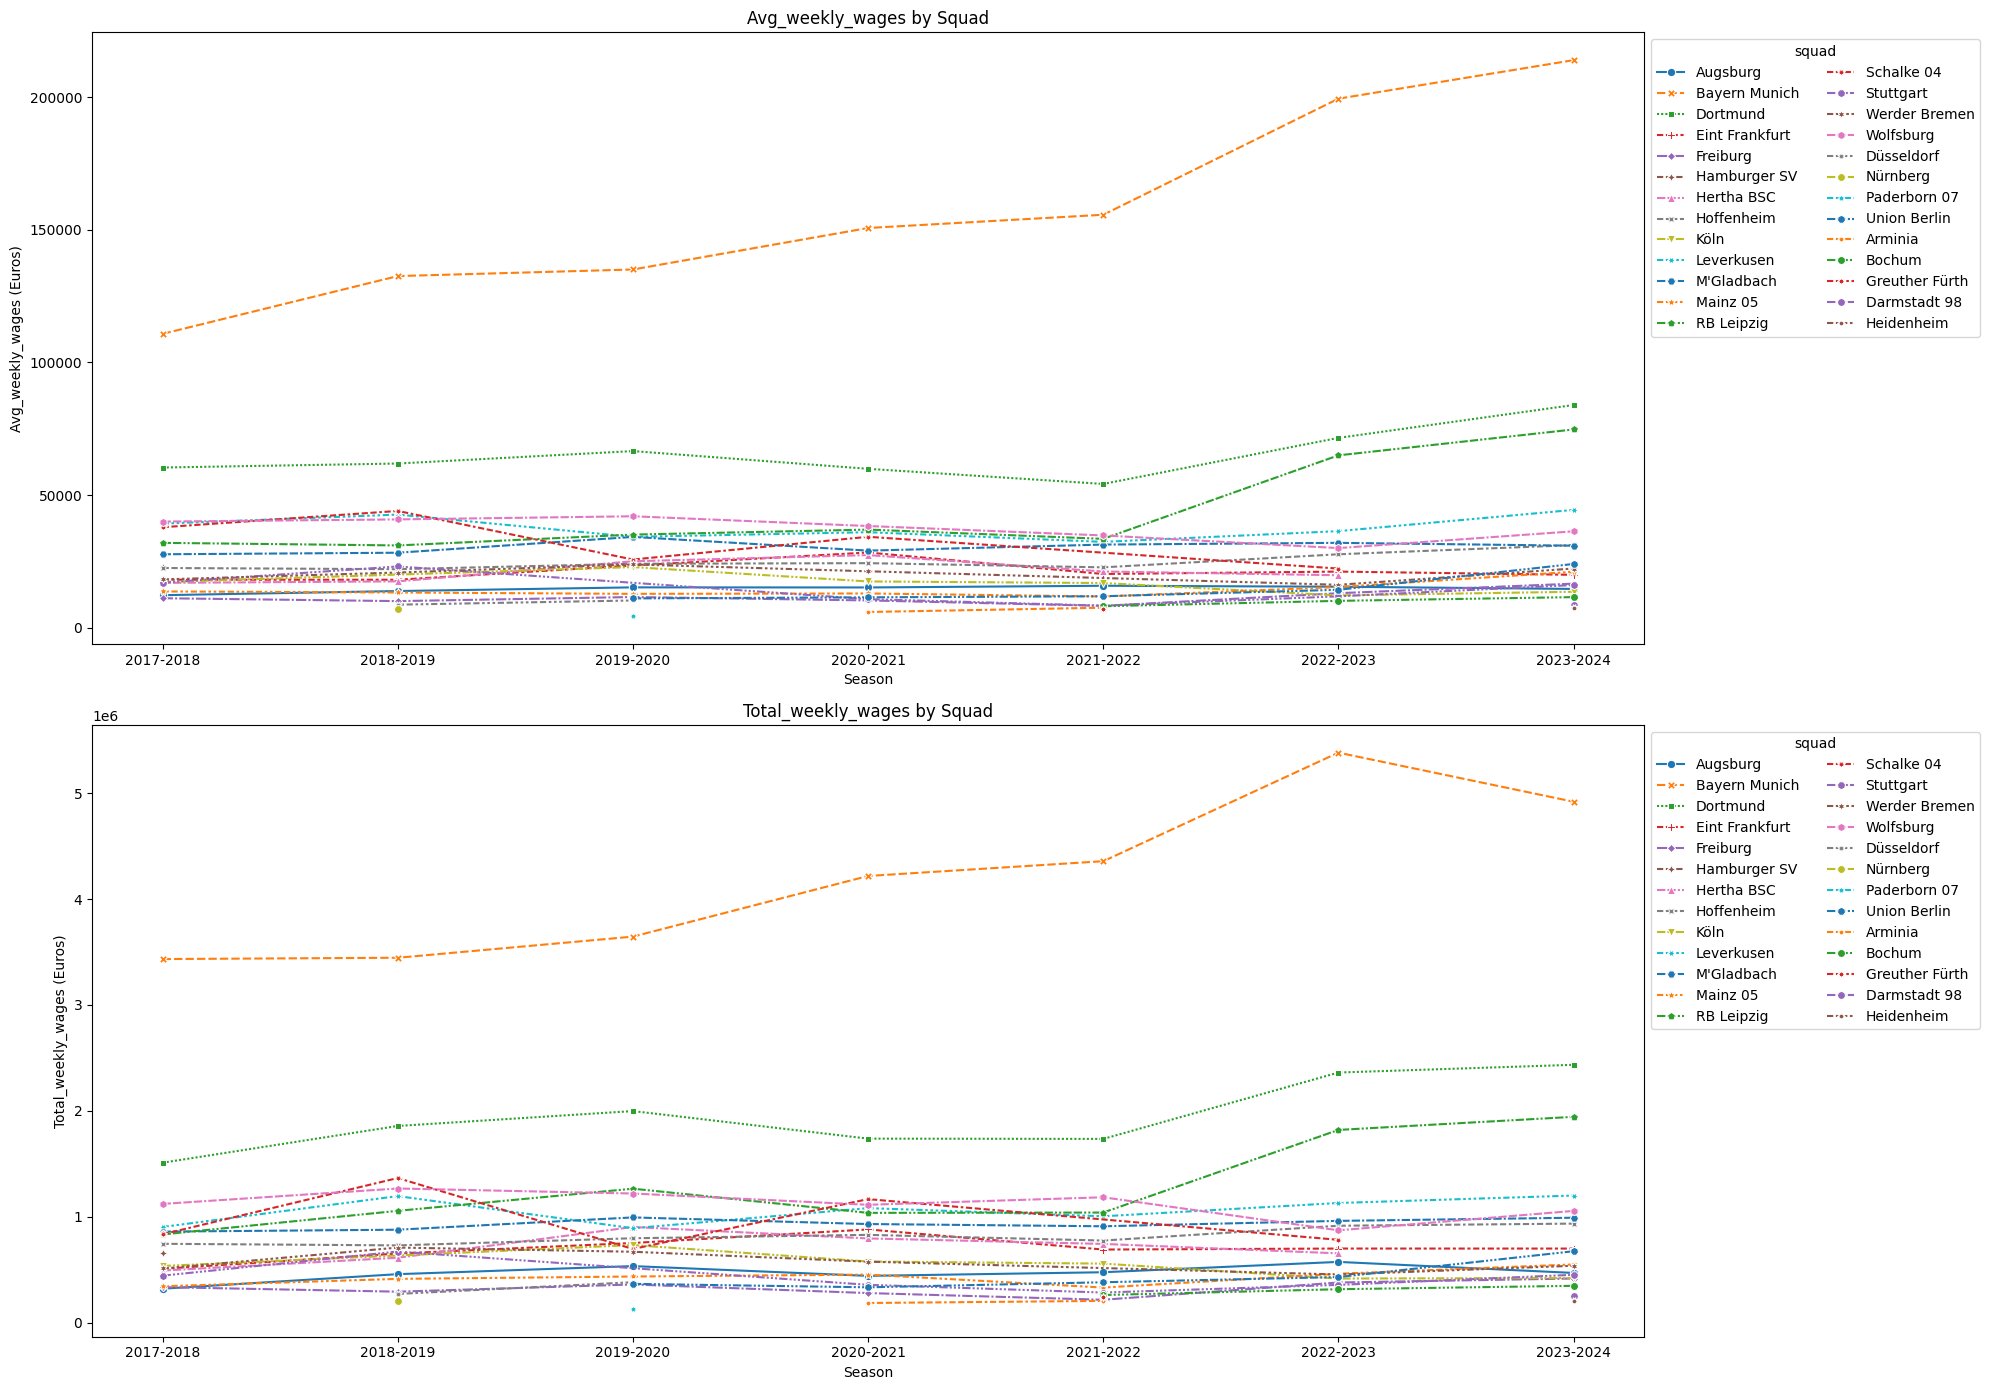

In [19]:
wage_plots.time_series('squad', figsize=(20,14))

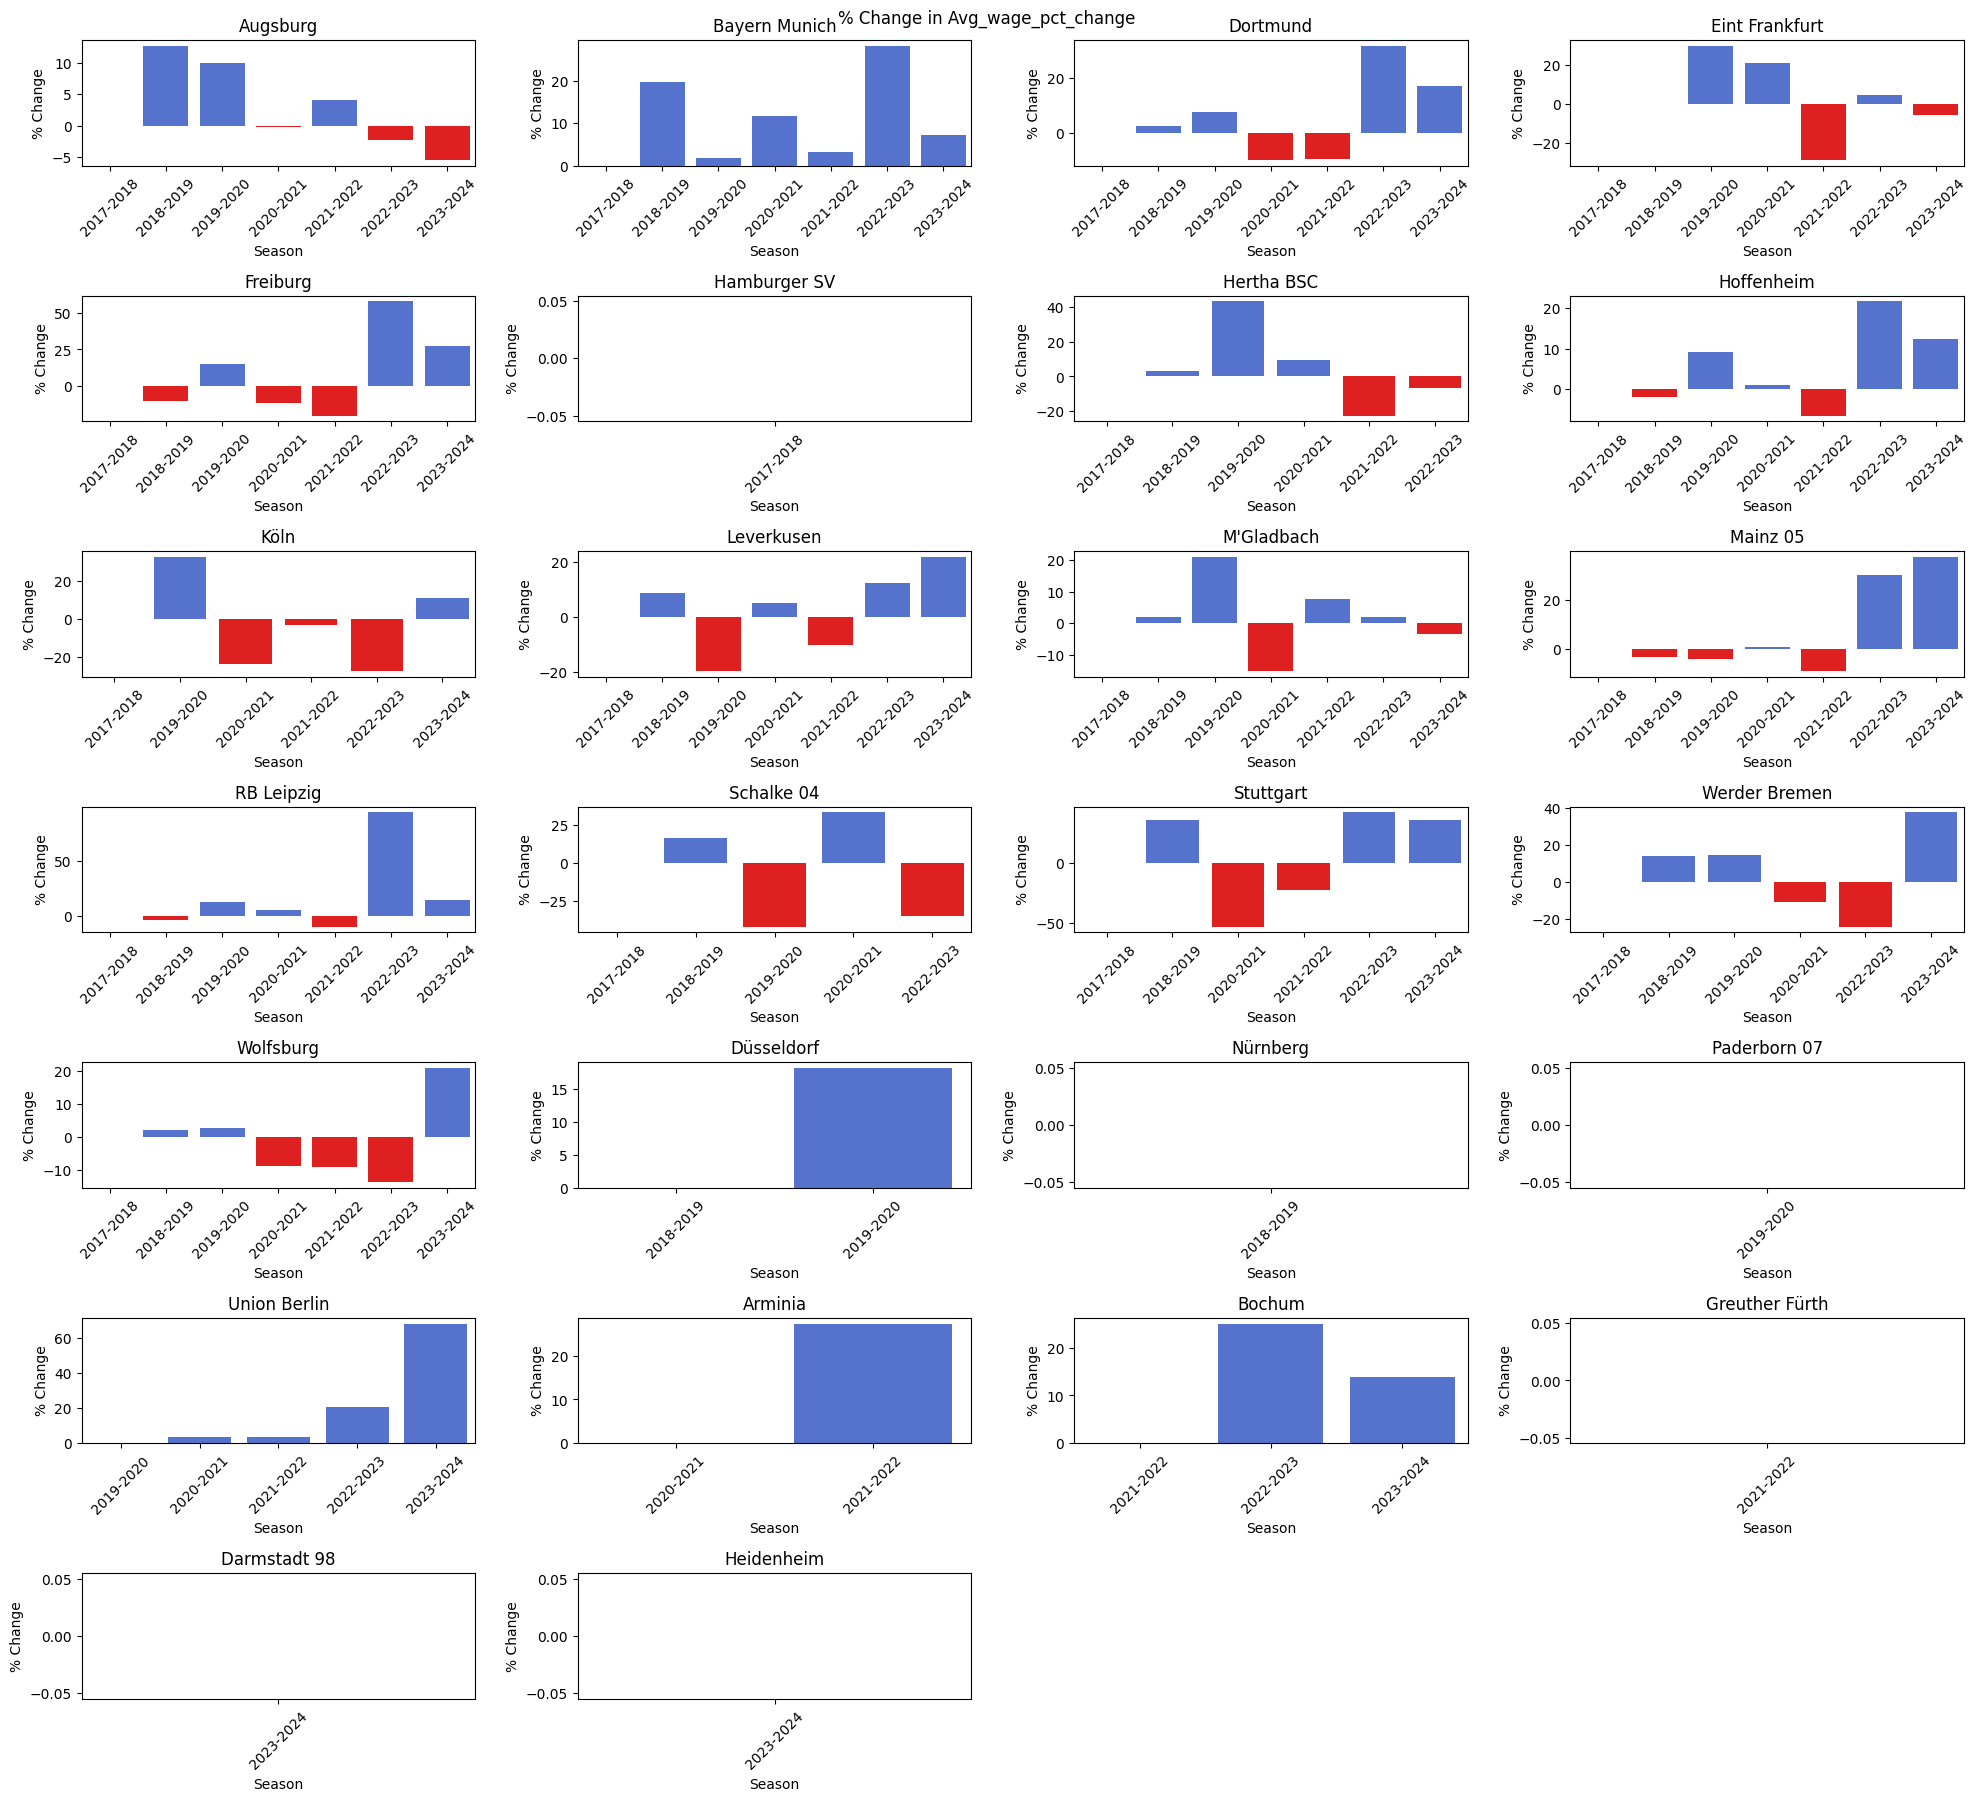

In [20]:
wage_plots.pct_change_plots('avg_wage_pct_change')

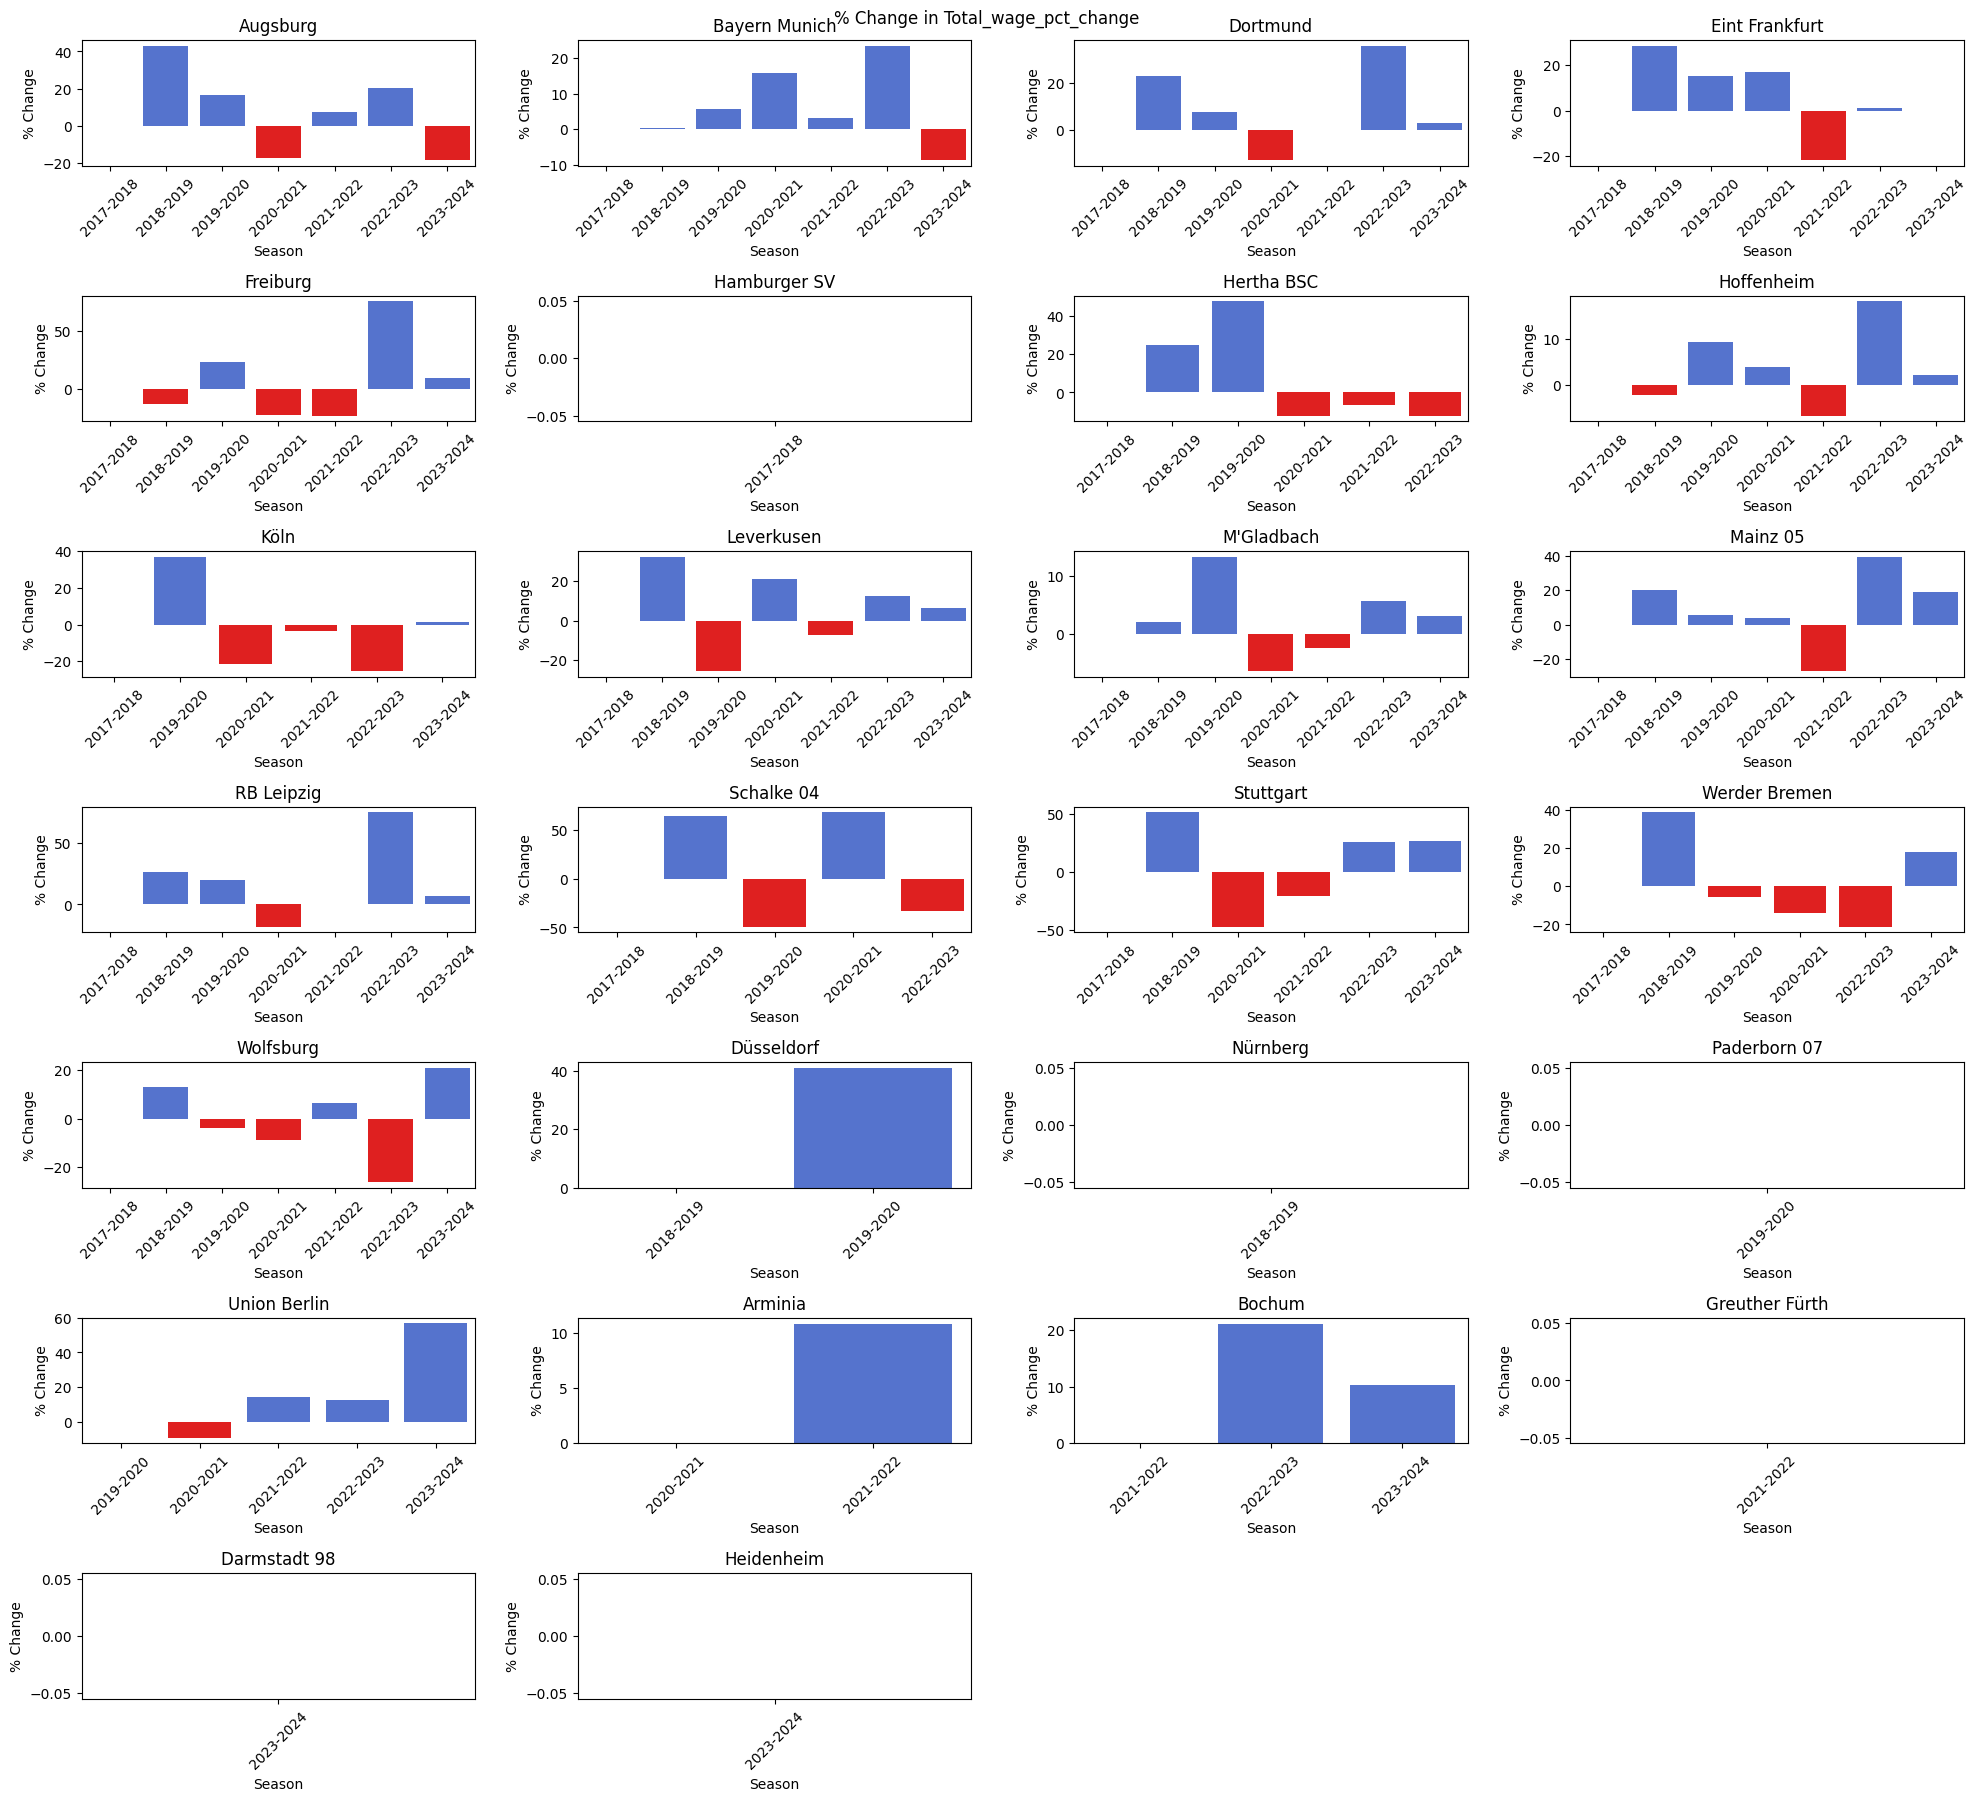

In [21]:
wage_plots.pct_change_plots('total_wage_pct_change')